In [46]:
!pip install pulp

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [47]:
import pandas as pd
from pulp import *
import matplotlib.pyplot as plt

In [48]:
ref_ranking = ['2>26', '20>6', '23>14', '17>3', '23=6']
variants = pd.read_csv('Nuclear waste management.csv')

In [49]:
variants.head()

,Unnamed: 0,C1,C2,C3,C4
0,1,0.60,0.93,0.00,0.73
1,2,0.66,0.55,0.45,0.49
2,3,1.00,0.45,0.57,0.50
3,4,0.48,0.87,0.00,0.75
4,5,0.62,0.40,0.56,0.50


In [50]:
variants.min()['C1']

0.32

In [51]:
variants.min()

Unnamed: 0    1.00
C1            0.32
C2            0.03
C3            0.00
C4            0.49
dtype: float64

In [52]:
def get_pairs(l):
  return [(l[i], l[i + 1]) for i in range(0, len(l), 1) if i + 1 < len(l)]

In [53]:
# Create a problem variable:
prob = LpProblem("UTA", LpMaximize)

u1_name = "utilitie1"
u2_name = "utilitie2"
u3_name = "utilitie3"
u4_name = "utilitie4"

# Create problem variables:
epsilon = LpVariable("e", lowBound=0, upBound=None) # e>=0
u1 = LpVariable.dicts(u1_name, list(variants['C1'].unique()), lowBound=0, upBound=1)
u2 = LpVariable.dicts(u2_name, list(variants['C2'].unique()), lowBound=0, upBound=1)
u3 = LpVariable.dicts(u3_name, list(variants['C3'].unique()), lowBound=0, upBound=1)
u4 = LpVariable.dicts(u4_name, list(variants['C4'].unique()), lowBound=0, upBound=1)

In [54]:
u1

{0.6: utilitie1_0.6,
 0.66: utilitie1_0.66,
 1.0: utilitie1_1.0,
 0.48: utilitie1_0.48,
 0.62: utilitie1_0.62,
 0.78: utilitie1_0.78,
 0.4: utilitie1_0.4,
 0.64: utilitie1_0.64,
 0.65: utilitie1_0.65,
 0.45: utilitie1_0.45,
 0.61: utilitie1_0.61,
 0.74: utilitie1_0.74,
 0.69: utilitie1_0.69,
 0.87: utilitie1_0.87,
 0.44: utilitie1_0.44,
 0.68: utilitie1_0.68,
 0.76: utilitie1_0.76,
 0.35: utilitie1_0.35,
 0.83: utilitie1_0.83,
 0.32: utilitie1_0.32,
 0.59: utilitie1_0.59,
 0.73: utilitie1_0.73,
 0.34: utilitie1_0.34,
 0.71: utilitie1_0.71,
 0.8: utilitie1_0.8}

In [55]:
prob += epsilon, "Profit"

In [60]:
# Constraints

# Ranking constrains
for pair in ref_ranking:
    if '>' in pair:
        i,j = [int(x) for x in pair.split('>')]
    elif '=' in pair:
        i,j = [int(x) for x in pair.split('=')]
    else:
      raise Exception

    var1 = variants.iloc[i-1]
    var2 = variants.iloc[j-1]

    if '>' in pair:
      prob += u1[var1['C1']] + u2[var1['C2']] + u3[var1['C3']] + u4[var1['C4']] >= u1[var2['C1']] + u2[var2['C2']] + u3[var2['C3']] + u4[var2['C4']] + epsilon
    elif '=' in pair:
      prob += u1[var1['C1']] + u2[var1['C2']] + u3[var1['C3']] + u4[var1['C4']] == u1[var2['C1']] + u2[var2['C2']] + u3[var2['C3']] + u4[var2['C4']]

# Normalization
prob += u1[variants.min()['C1']] + u2[variants.min()['C2']] + u3[variants.min()['C3']] + u4[variants.min()['C4']] == 1

prob += u1[variants.max()['C1']] == 0
prob += u2[variants.max()['C2']] == 0
prob += u3[variants.max()['C3']] == 0
prob += u4[variants.max()['C4']] == 0

# Monotonicity
sorted_c1 = sorted(list(variants['C1'].unique()))
sorted_c2 = sorted(list(variants['C2'].unique()))
sorted_c3 = sorted(list(variants['C3'].unique()))
sorted_c4 = sorted(list(variants['C4'].unique()))
for val1, val2 in get_pairs(sorted_c1):
  prob += u1[val1] >= u1[val2]
for val1, val2 in get_pairs(sorted_c2):
  prob += u2[val1] >= u2[val2]
for val1, val2 in get_pairs(sorted_c3):
  prob += u3[val1] >= u3[val2]
for val1, val2 in get_pairs(sorted_c4):
  prob += u4[val1] >= u4[val2]

# Non-negativity
for utility in sorted_c1:
  prob += u1[utility] >= 0
for utility in sorted_c2:
  prob += u2[utility] >= 0
for utility in sorted_c3:
  prob += u3[utility] >= 0
for utility in sorted_c4:
  prob += u4[utility] >= 0

In [61]:
prob

UTA:
MAXIMIZE
1*e + 0
SUBJECT TO
_C1: - e + utilitie1_0.66 - utilitie1_0.71 - utilitie2_0.25 + utilitie2_0.55
 + utilitie3_0.45 - utilitie3_0.88 + utilitie4_0.49 - utilitie4_0.67 >= 0

_C2: - e + utilitie1_0.64 - utilitie1_0.78 + utilitie2_0.22 - utilitie2_0.27
 - utilitie3_0.71 + utilitie3_0.81 - utilitie4_0.5 + utilitie4_0.65 >= 0

_C3: - e + utilitie1_0.59 - utilitie1_0.69 + utilitie2_0.24 - utilitie2_0.49
 - utilitie3_0.56 + utilitie3_0.7 - utilitie4_0.61 + utilitie4_0.63 >= 0

_C4: - e + utilitie1_0.68 - utilitie1_1.0 + utilitie2_0.4 - utilitie2_0.45
 - utilitie3_0.57 + utilitie3_0.65 - utilitie4_0.5 + utilitie4_0.6 >= 0

_C5: utilitie1_0.59 - utilitie1_0.78 + utilitie2_0.24 - utilitie2_0.27
 + utilitie3_0.7 - utilitie3_0.71 - utilitie4_0.5 + utilitie4_0.63 = 0

_C6: utilitie1_0.32 + utilitie2_0.03 + utilitie3_0.0 + utilitie4_0.49 = 1

_C7: utilitie1_1.0 = 0

_C8: utilitie2_1.0 = 0

_C9: utilitie3_1.0 = 0

_C10: utilitie4_1.0 = 0

_C11: utilitie1_0.32 - utilitie1_0.34 >= 0

_C12: 

In [63]:
prob.solve()
print("Status:", LpStatus[prob.status])

utilitie_functions = {
    u1_name: [[],[]],
    u2_name: [[],[]],
    u3_name: [[],[]],
    u4_name: [[],[]],
}

for v in prob.variables():
    print(v.name, "=", v.varValue)
    if 'utilitie' in v.name:
        u_name, u_x = v.name.split('_')
        utilitie_functions[u_name][0].append(float(u_x))
        utilitie_functions[u_name][1].append(float(v.varValue))


# Print the optimal profit
print("Epsilon: ", value(prob.objective))
print(utilitie_functions)

Status: Optimal
Epsilon:  0.375
{'utilitie1': [[0.32, 0.34, 0.35, 0.4, 0.44, 0.45, 0.48, 0.59, 0.6, 0.61, 0.62, 0.64, 0.65, 0.66, 0.68, 0.69, 0.71, 0.73, 0.74, 0.76, 0.78, 0.8, 0.83, 0.87, 1.0], [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'utilitie2': [[0.03, 0.06, 0.22, 0.24, 0.25, 0.27, 0.3, 0.4, 0.44, 0.45, 0.49, 0.54, 0.55, 0.83, 0.86, 0.87, 0.9, 0.91, 0.93, 0.95, 0.97, 1.0], [0.5, 0.5, 0.5, 0.125, 0.125, 0.125, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'utilitie3': [[0.0, 0.38, 0.45, 0.54, 0.56, 0.57, 0.65, 0.7, 0.71, 0.8, 0.81, 0.88, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'utilitie4': [[0.49, 0.5, 0.54, 0.55, 0.6, 0.61, 0.63, 0.65, 0.67, 0.73, 0.75, 0.82, 0.9, 0.91, 0.94, 0.98, 1.0], [0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}


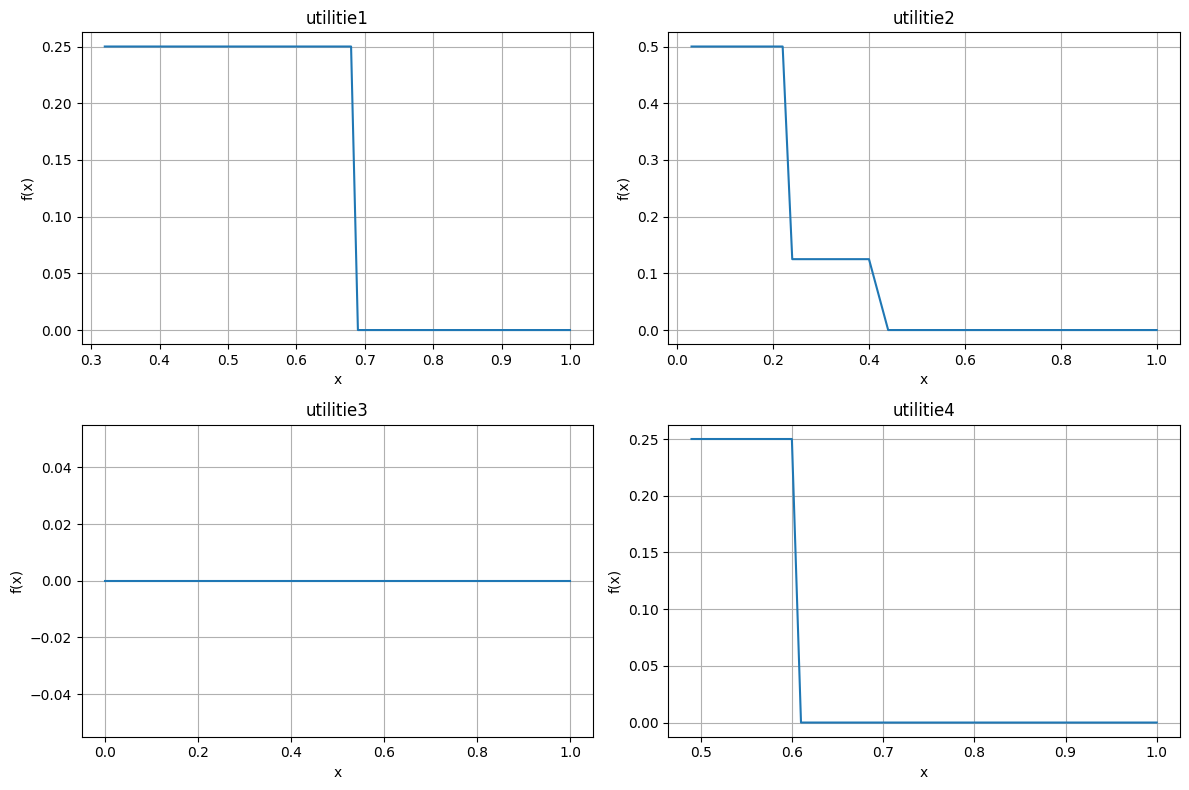

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx, (name, (x, y)) in enumerate(utilitie_functions.items()):
    row = idx // 2
    col = idx % 2
    axs[row, col].plot(x, y)
    axs[row, col].set_xlabel('x')
    axs[row, col].set_ylabel('f(x)')
    axs[row, col].set_title(name)
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()